# AI Email Spam Dedector

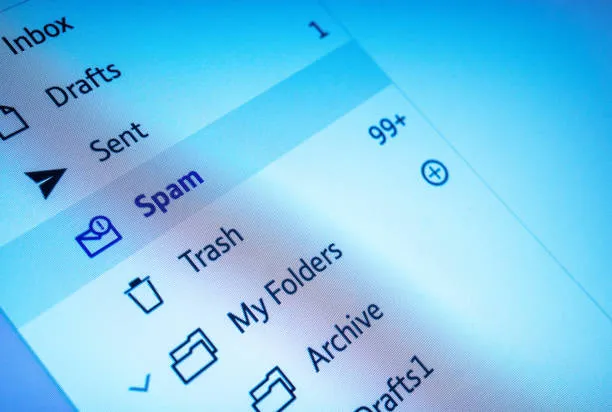


Team:
- Marouane El Goumiri
- Youssef Hajjaj




In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 28.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 77.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
dataset_path = '/content/drive/My Drive/Data_Science_2024/Detection_Spam_Emails/spam.csv'
!cp "$dataset_path" /content/

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

data.columns = ['Category', 'Message']

print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Message'])

In [ ]:
sequences = tokenizer.texts_to_sequences(data['Message'])

In [ ]:
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = data['Category'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.8773 - loss: 0.3081 - val_accuracy: 0.9776 - val_loss: 0.0784
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9809 - val_loss: 0.0766
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9809 - val_loss: 0.0846
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9832 - val_loss: 0.0920
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.9999 - loss: 7.8986e-04 - val_accuracy: 0.9832 - val_loss: 0.0860


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9854 - loss: 0.0657
Test Accuracy: 0.99


In [ ]:
# List of example messages
example_messages = [
    "Congratulations! You've won a free ticket to Bahamas. Call now!",
    "Go until jurong point, crazy.. Available only in bugis n great world la e buffet.",
    "WINNER!! As a valued network customer you have been selected to receive a £900 prize reward! To claim call 09061701461.",
    "Even my brother is not like to speak with me. They treat me like aids patient.",
    "FreeMsg Hey there darling it's been 3 weeks now and no word back! I'd like some fun you up for it still?",
    "Ok lar... Joking wif u oni...",
    "Had your mobile 11 months or more? You are entitled to update to the latest colour mobiles with camera for free!"
]

# Preprocess and predict
example_seqs = pad_sequences(tokenizer.texts_to_sequences(example_messages), maxlen=max_len)
predictions = model.predict(example_seqs)

# Prepare results in a table format
results = []
for msg, pred in zip(example_messages, predictions):
    label = "Spam" if pred[0] > 0.5 else "Ham"
    results.append([msg, label])

# Convert results to DataFrame
result_df = pd.DataFrame(results, columns=["Message", "Prediction"])
print(result_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
                                             Message Prediction
0  Congratulations! You've won a free ticket to B...       Spam
1  Go until jurong point, crazy.. Available only ...        Ham
2  WINNER!! As a valued network customer you have...       Spam
3  Even my brother is not like to speak with me. ...        Ham
4  FreeMsg Hey there darling it's been 3 weeks no...        Ham
5                      Ok lar... Joking wif u oni...        Ham
6  Had your mobile 11 months or more? You are ent...       Spam


expected output

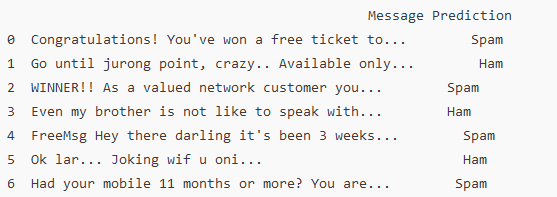

In [ ]:
# Save the entire model in the native Keras format
model.save('/content/spam_detection_model.keras')

In [ ]:
# Save the model to Google Drive
model.save('/content/drive/My Drive/Data_Science_2024/Detection_Spam_Emails/spam_detection_model.keras')

 _________________________________
# **Second Version**

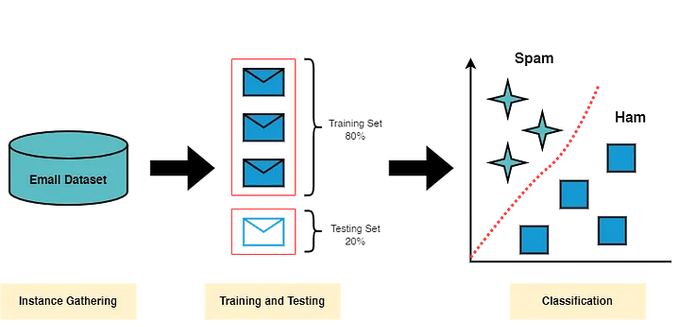

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV , KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

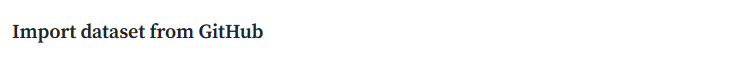

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Sanjay-dev-ds/spam_ham_email_detector/master/spam.csv")
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


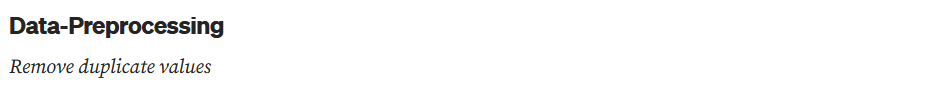

In [ ]:
df = df.drop_duplicates(keep='first')

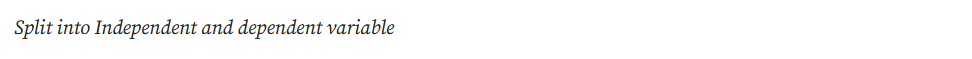

In [ ]:
x = df['EmailText'].values
y = df['Label'].values

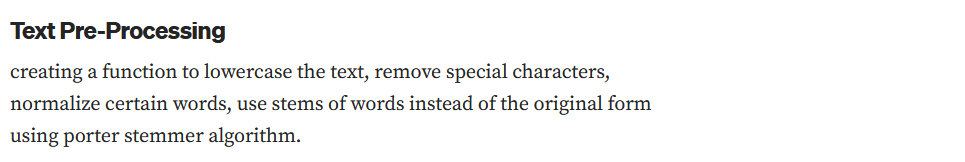

In [ ]:
porter_stemmer=PorterStemmer()
def preprocessor(text):

    text=text.lower()
    text=re.sub("\\W"," ",text)
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text)
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

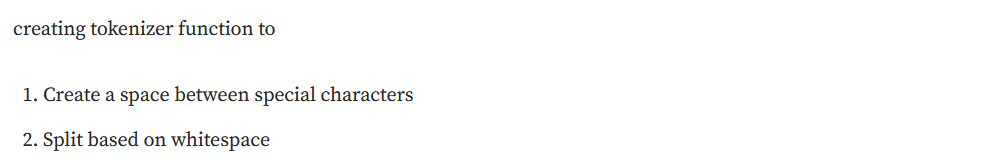

In [ ]:
def tokenizer(text):
    text=re.sub("(\\W)"," \\1 ",text)
    return re.split("\\s+",text)

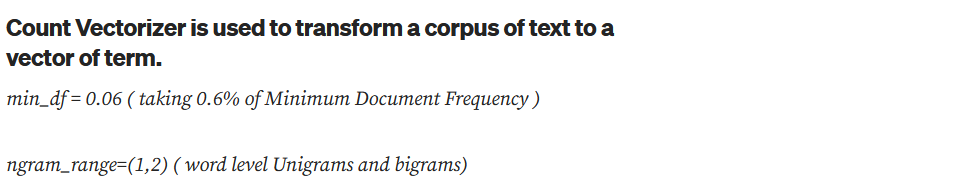

In [ ]:
vectorizer = CountVectorizer(tokenizer=tokenizer,ngram_range=(1,2),min_df=0.006,preprocessor=preprocessor)
x  = vectorizer.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


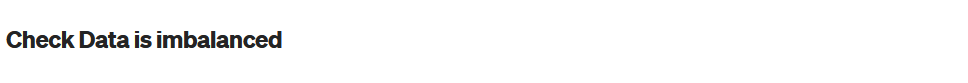

<Axes: xlabel='count', ylabel='Label'>

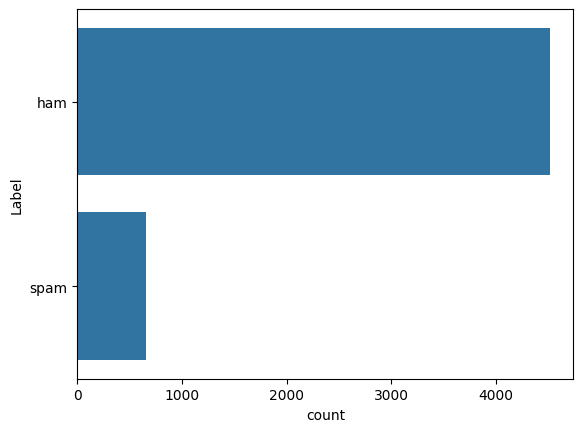

In [ ]:
sns.countplot(df['Label'])

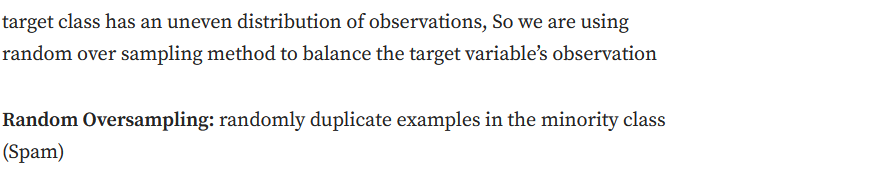

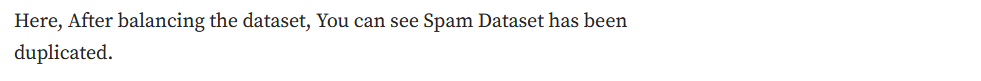

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

print('Original dataset shape', Counter(y))

# fit predictor and target
x,y = ros.fit_resample(x, y)

print('Modified dataset shape', Counter(y))

Original dataset shape Counter({'ham': 4516, 'spam': 653})
Modified dataset shape Counter({'ham': 4516, 'spam': 4516})


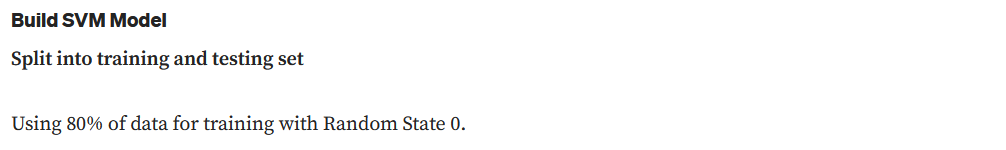

In [ ]:
x_train , x_test , y_train , y_test   = train_test_split(x, y, test_size =0.2,random_state = 0)

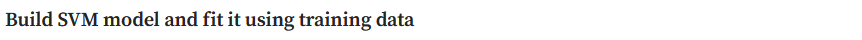

In [ ]:
model   = SVC(C =1,kernel = "linear" )
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
accuracy = metrics.accuracy_score(y_test, model.predict(x_test))
accuracy_percentage = 100 * accuracy
accuracy_percentage

98.83785279468734

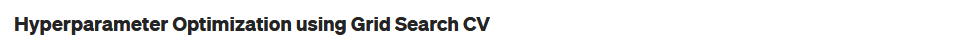

In [ ]:
params  = {"C":[0.2,0.5] , "kernel" : ['linear', 'sigmoid'] }

In [ ]:
cval = KFold(n_splits = 2)
model =  SVC();
TunedModel = GridSearchCV(model,params,cv= cval)
TunedModel.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.2, 0.5], 'kernel': ['linear', 'sigmoid']})

In [ ]:
accuracy = metrics.accuracy_score(y_test, TunedModel.predict(x_test))
accuracy_percentage = 100 * accuracy
accuracy_percentage

99.0038738240177

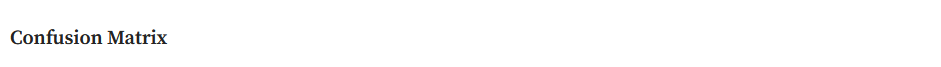

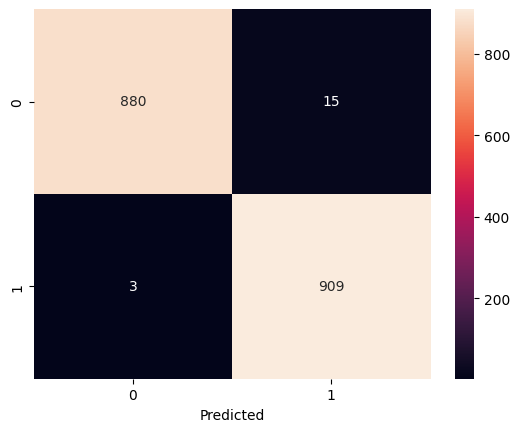

In [ ]:
sns.heatmap(confusion_matrix(y_test,TunedModel.predict(x_test)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [ ]:
print(classification_report(y_test,TunedModel.predict(x_test)))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       895
        spam       0.98      1.00      0.99       912

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



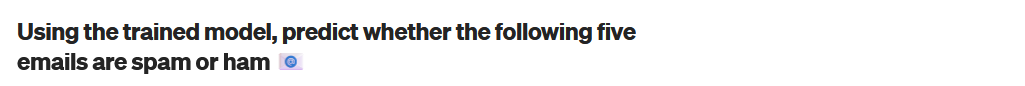

In [ ]:
emails = [
    "Hey, you have won a brand new car! Congratulations!!! 🎉 Claim now to receive it.",
    "Dear applicant, your CV has been received. We will get back to you soon. Best regards.",
    "You have received a deposit of $1,000,000 into your account. Click here to claim it.",
    "Join our exclusive WhatsApp group for amazing offers and opportunities. Limited slots available!",
    "Kindly check the email I sent earlier regarding the project deadline. Looking forward to your response.",
    "Congratulations! You've been selected for a free vacation to Hawaii. Call now to confirm your booking.",
    "Your Netflix subscription will expire today. Renew immediately to avoid service interruption.",
    "Important update: Your account has been compromised. Reset your password urgently to secure it.",
    "Meeting reminder: Please join the Zoom call at 3 PM today to discuss project updates.",
    "Special offer: Buy one, get one free on all products this weekend! Shop now!"
]
for mail in emails:
  is_spam = TunedModel.predict(vectorizer.transform([mail]).toarray())
  print(mail + " : "+ is_spam)

['Hey, you have won a brand new car! Congratulations!!! 🎉 Claim now to receive it. : spam']
['Dear applicant, your CV has been received. We will get back to you soon. Best regards. : ham']
['You have received a deposit of $1,000,000 into your account. Click here to claim it. : spam']
['Join our exclusive WhatsApp group for amazing offers and opportunities. Limited slots available! : ham']
['Kindly check the email I sent earlier regarding the project deadline. Looking forward to your response. : ham']
["Congratulations! You've been selected for a free vacation to Hawaii. Call now to confirm your booking. : spam"]
['Your Netflix subscription will expire today. Renew immediately to avoid service interruption. : ham']
['Important update: Your account has been compromised. Reset your password urgently to secure it. : spam']
['Meeting reminder: Please join the Zoom call at 3 PM today to discuss project updates. : ham']
['Special offer: Buy one, get one free on all products this weekend! Shop

In [ ]:
data = pd.read_csv("spam.csv", encoding='latin-1')

correct_predictions = 0
total_predictions = len(data)

print("Email Classification Results (Comparison with Original):")
print("=" * 70)

for index, row in data.iterrows():
    email = row["Message"]
    original_label = row["Category"]

    # Predict spam or ham
    prediction = TunedModel.predict(vectorizer.transform([email]).toarray())

    if prediction == original_label.lower():  # Ensure case-insensitive comparison
        correct_predictions += 1

    # Display the result with comparison
    print(f"Email: \"{email}\"")
    print(f"Original Label: {original_label} | Predicted Label: {prediction}")
    print("-" * 70)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Email: "Do you want a new video handset? 750 anytime any network mins? Half Price Line Rental? Camcorder? Reply or call 08000930705 for delivery tomorrow"
Original Label: spam | Predicted Label: ['spam']
----------------------------------------------------------------------
Email: "Went fast asleep dear.take care."
Original Label: ham | Predicted Label: ['ham']
----------------------------------------------------------------------
Email: "No that just means you have a fat head"
Original Label: ham | Predicted Label: ['ham']
----------------------------------------------------------------------
Email: "Sounds like a plan! Cardiff is still here and still cold! I'm sitting on the radiator!"
Original Label: ham | Predicted Label: ['ham']
----------------------------------------------------------------------
Email: "Serious? What like proper tongued her"
Original Label: ham | Predicted Label: ['ham']
-------------

In [ ]:
accuracy = (correct_predictions / total_predictions) * 100
print(f"Prediction Accuracy: {accuracy:.2f}% ({correct_predictions}/{total_predictions} correct predictions)")

Prediction Accuracy: 99.19% (5527/5572 correct predictions)


In [ ]:
import joblib

export_path = '/content/drive/My Drive/Data_Science_2024/Detection_Spam_Emails/TunedModel.pkl'
vectorizer_path = '/content/drive/My Drive/Data_Science_2024/Detection_Spam_Emails/vectorizer.pkl'


joblib.dump(vectorizer, vectorizer_path)
joblib.dump(TunedModel, export_path)

['/content/drive/My Drive/Data_Science_2024/Detection_Spam_Emails/TunedModel.pkl']